1. Set up environment

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
titanic = pd.read_csv('/content/train.csv')

2. Exploratory Data Analysis (EDA)

In [4]:
# View first few rows
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
# Basic statistics
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
# Check for missing values
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Data types
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


#3. Analyze Survival Rates
1. Survival Rate by Gender

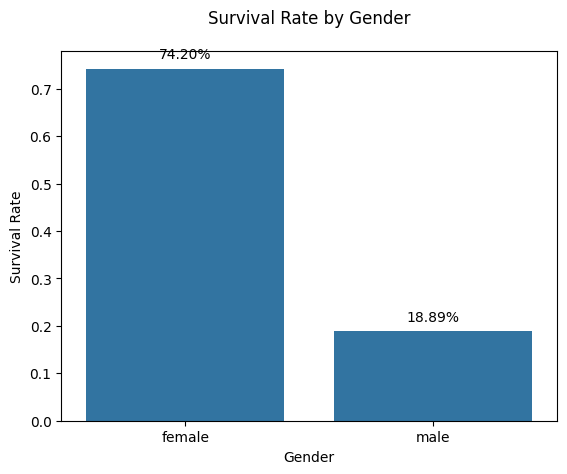

In [13]:
# Calculate survival rates
gender_survival = titanic.groupby('Sex')['Survived'].mean().reset_index()

# Create plot
ax = sns.barplot(x='Sex', y='Survived', data=gender_survival)

# Add title and labels
plt.title('Survival Rate by Gender', pad=20)
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

2. Survival Rate by Passenger Class

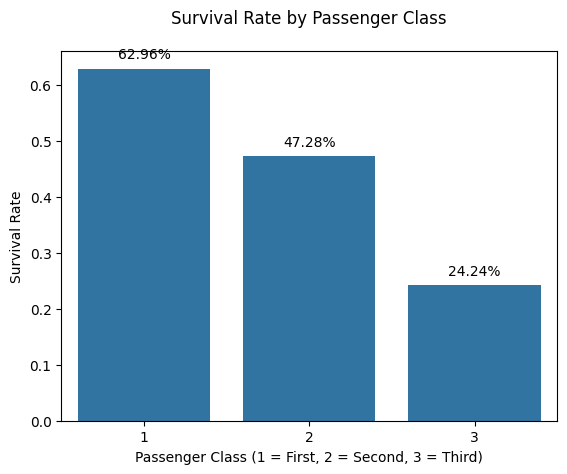

In [15]:
# Calculate survival rates
class_survival = titanic.groupby('Pclass')['Survived'].mean().reset_index()

# Create plot
ax = sns.barplot(x='Pclass', y='Survived', data=class_survival)

# Add title and labels
plt.title('Survival Rate by Passenger Class', pad=20)
plt.xlabel('Passenger Class (1 = First, 2 = Second, 3 = Third)')
plt.ylabel('Survival Rate')

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

3. Survival Rate by Age Group

/tmp/ipython-input-17-381721218.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic.groupby('age_group')['Survived'].mean().reset_index()


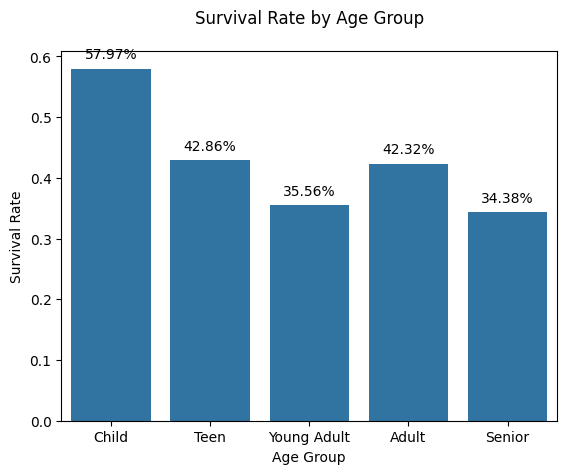

In [17]:
# Create age groups
titanic['age_group'] = pd.cut(titanic['Age'],
                             bins=[0, 12, 18, 30, 50, 100],
                             labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Calculate survival rates
age_survival = titanic.groupby('age_group')['Survived'].mean().reset_index()

# Create plot
ax = sns.barplot(x='age_group', y='Survived', data=age_survival)

# Add title and labels
plt.title('Survival Rate by Age Group', pad=20)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

4. Combined Analysis - Gender and Class

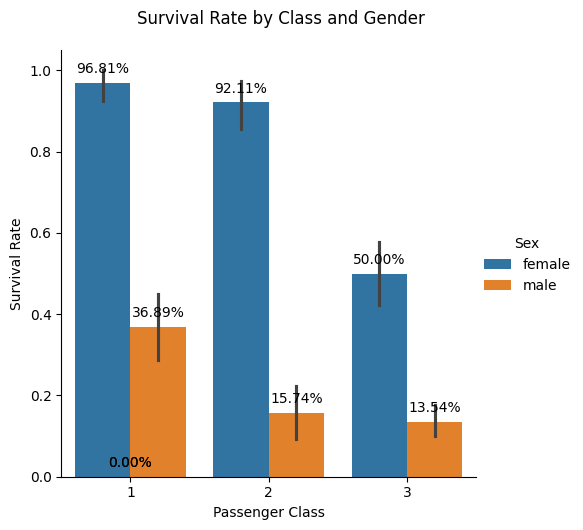

In [24]:
# Create plot
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=titanic)

# Add title and labels
g.fig.suptitle('Survival Rate by Class and Gender', y=1.05)
g.set_axis_labels('Passenger Class', 'Survival Rate')

# Add data labels
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2%}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

plt.show()

5. Combined Analysis - Age, Gender and Class

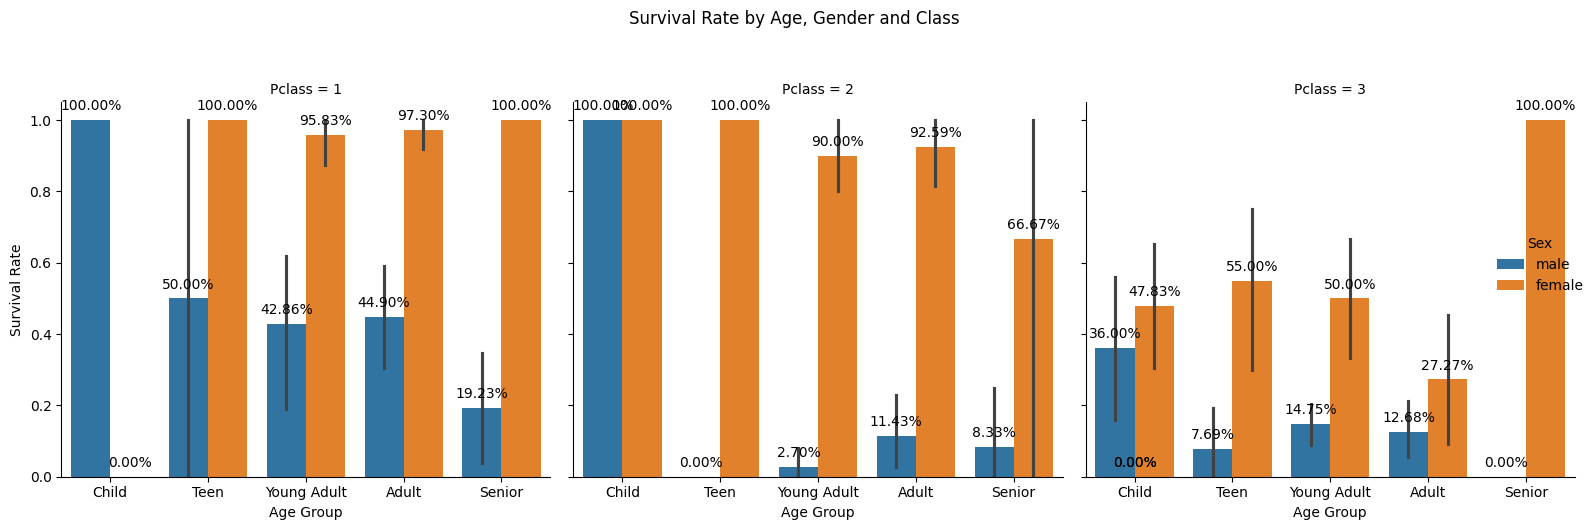

In [26]:
# Create plot
g = sns.catplot(x='age_group', y='Survived', hue='Sex', col='Pclass', kind='bar', data=titanic)

# Add title and labels
g.fig.suptitle('Survival Rate by Age, Gender and Class', y=1.05)
g.set_axis_labels('Age Group', 'Survival Rate')

# Add data labels
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2%}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

plt.tight_layout()
plt.show()